# Άσκηση

Στην άσκηση αυτή θα προσπαθήσουμε να εντοπίσουμε σε πόσες και ποιες κατηγορίες ανήκει ένα σύνολο κειμένων. Για την άσκηση αυτή θα σας δώσουμε ένα σύνολο κειμένων το οποίο δεν γνωρίζουμε σε πόσες κατηγορίες μπορεί να χωριστεί. 

Αρχικά κάνουμε import τις βιβλιοθήκες που θα χρειαστούμε.

In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

Φέρνουμε το σύνολο κειμένων μας.

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_6855329bf6234cbab4d9298aa9d10b45(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_ee63424e44d2866a1af52aad91e78cabc07af90f','domain': {'id': 'a373b77d42c545dbba5c4781cd738a0e'},
            'password': 'Gvjx-n]V76mxEykV'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data = ''.join(get_object_storage_file_with_credentials_6855329bf6234cbab4d9298aa9d10b45('neuralnetworks', 'data')).split('-'*10)
print 'number of documents in corpus:', len(data)

number of documents in corpus: 186


Θα χρησιμοποιήσουμε το [TF-IDF Vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) του scikit-learn προκειμένου να μετατρέψουμε τα κείμενά μας σε έναν πίνακα διανυσμάτων. Καλείστε να πειραματιστείτε και να επιλέξετε εσείς τα ορίσματα του TF-IDF. Στη συνέχεια θα χρησιμοποιήσουμε τον αλγόριθμο k-means και τη μετρική silhouette για να εντοπίσουμε τον αριθμό των ομάδων στις οποίες ανήκουν τα κείμενα. Για να μπορέσουμε να δούμε και ορισμένα στοιχεία για τις θεματικές ενότητες στις οποίες ανήκουν τα κείμενα, θα τυπώσουμε τους πιο σημαντικούς όρους της κάθε ομάδας.

---


1 . Δοκιμάστε να τρέξετε τον TF-IDF Vectorizer χωρίς παραμέτρους. Τι διαστάσεις έχει το διάνυσμα TF-IDF; Τα αποτελέσματα βγάζουν νόημα;

TF-IDF array shape: (186, 24181)



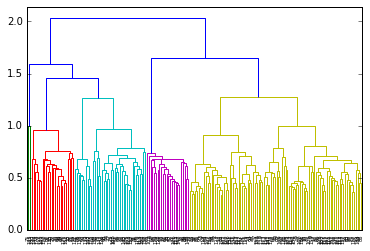

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage


vectorizer = TfidfVectorizer()

tf_idf_array = vectorizer.fit_transform(data).toarray()
print 'TF-IDF array shape:', tf_idf_array.shape

Z = linkage(tf_idf_array, 'ward')
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

---
2 . Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας τα english stopwords (παράμετρος stop_words='english'). Τι διαστάσεις έχει τώρα το διάνυσμα; Βελτιώθηκε καθόλου η ποιότητα του clustering;

TF-IDF array shape: (186, 23880)



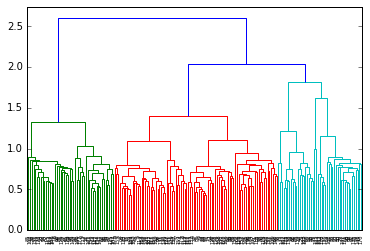

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')

tf_idf_array = vectorizer.fit_transform(data).toarray()
print 'TF-IDF array shape:', tf_idf_array.shape

Z = linkage(tf_idf_array, 'ward')
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

---
3 . Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας και τους όρους που εμφανίζονται λιγότερες από 2 φορές (παράμετρος min_df=2). Τι διαστάσεις έχει το διάνυσμα; Βελτιώθηκε το clustering;

TF-IDF array shape: (186, 11439)



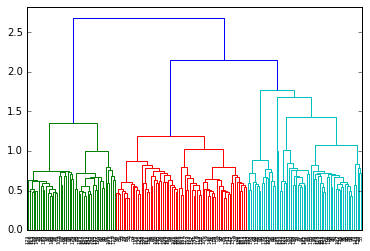

In [5]:
vectorizer = TfidfVectorizer(stop_words='english',min_df=2)

tf_idf_array = vectorizer.fit_transform(data).toarray()
print 'TF-IDF array shape:', tf_idf_array.shape

Z = linkage(tf_idf_array, 'ward')
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

---

4 . Δοκιμάστε να τρέξετε τον Vectorizer, αφαιρώντας και τους όρους που εμφανίζονται σε περισσότερα από το 50% των κειμένων (παράμετρος max_df=0.5). Βελτιώνει αυτό το clustering;

TF-IDF array shape: (186, 11368)



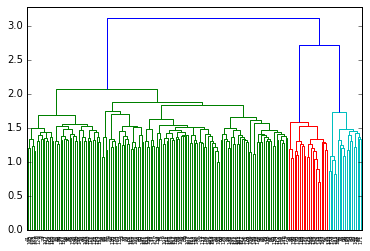

In [6]:
vectorizer = TfidfVectorizer(stop_words='english',min_df=2,max_df=0.5)

tf_idf_array = vectorizer.fit_transform(data).toarray()
print 'TF-IDF array shape:', tf_idf_array.shape

Z = linkage(tf_idf_array, 'ward')
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

---
5 . Δοκιμάστε να βελτιώσετε περαιτέρω την ποιότητα του clustering. Σε πόσες κατηγορίες χωρίζεται το σύνολο των κειμένων μας; Ποια είναι η θεματική ενότητα της κάθε κατηγορίας;